In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

In [2]:
df = pd.read_csv('heart.csv')


df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df["HeartDisease"].unique()

array([0, 1])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
numerical_column = df.select_dtypes(include=np.number).columns
categorical_column = df.select_dtypes(exclude=np.number).columns

numerical_column

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [8]:
categorical_column
df["HeartDisease"].unique()

array([0, 1])

In [9]:
numerical_column = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
df["HeartDisease"].unique()

array([0, 1])

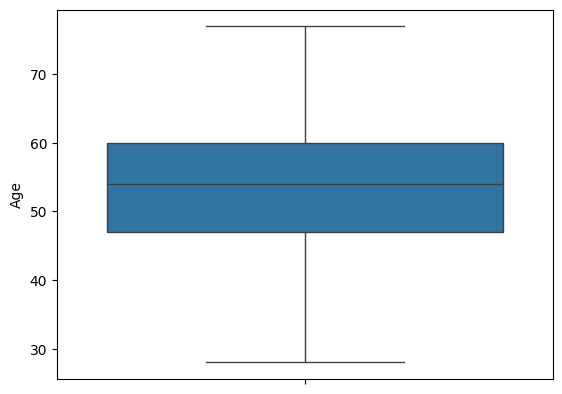

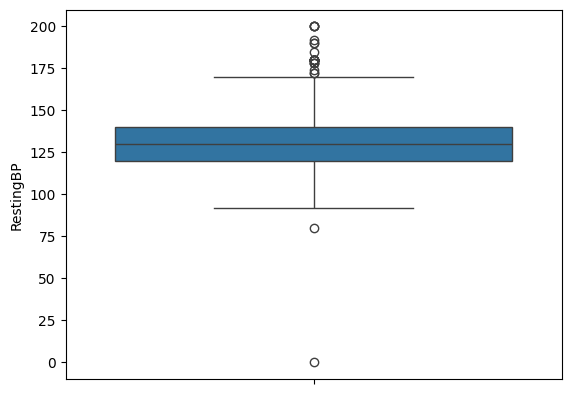

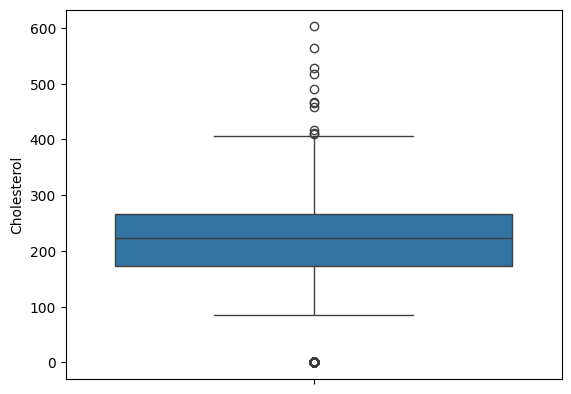

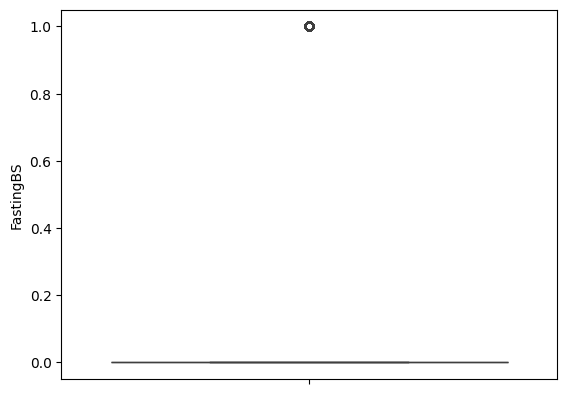

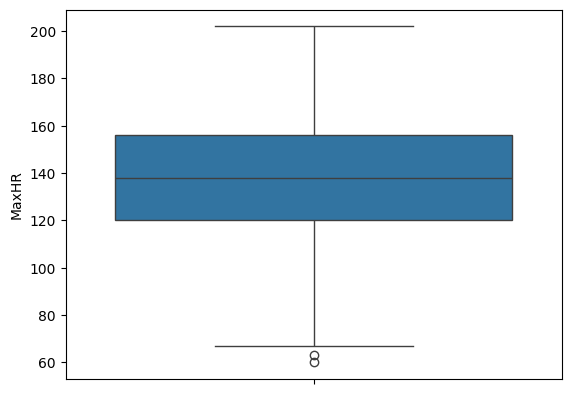

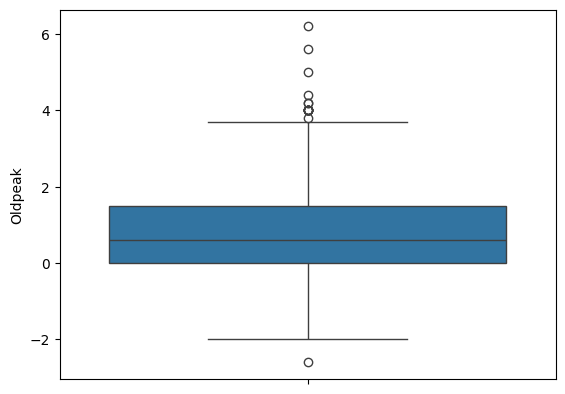

In [10]:
for column in numerical_column:
  sns.boxplot(df[column])
  plt.show()

In [11]:
df.dropna(inplace=True)

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
numerical_column


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [13]:
print(df["HeartDisease"].unique())
for column in numerical_column:          # pastikan 'HeartDisease' tidak ada di sini
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[column] = df[column].clip(lower=lower, upper=upper)

print(df["HeartDisease"].unique())

[0 1]
[0 1]


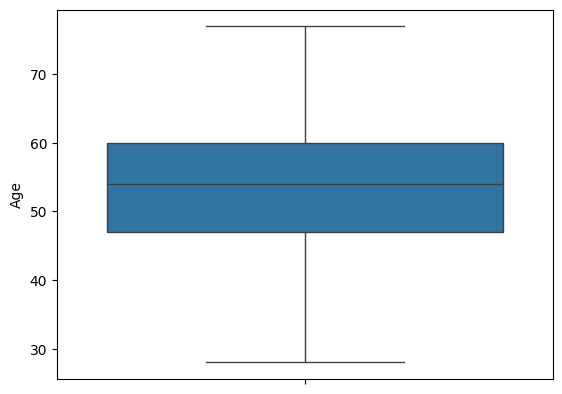

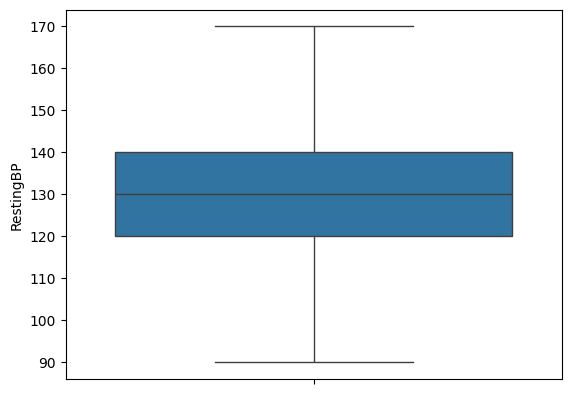

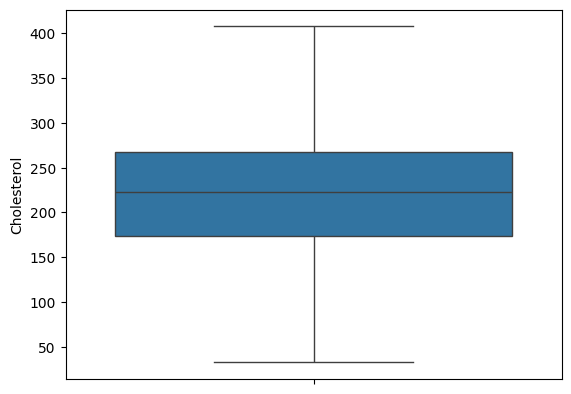

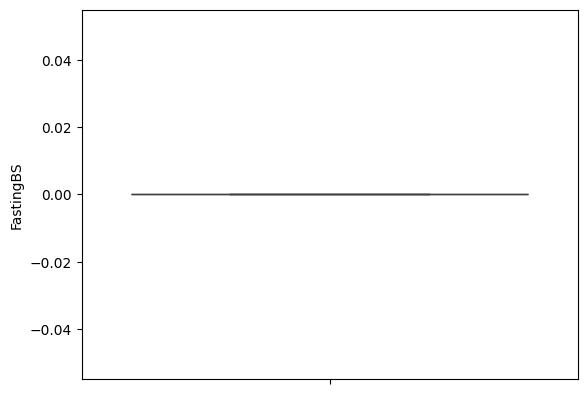

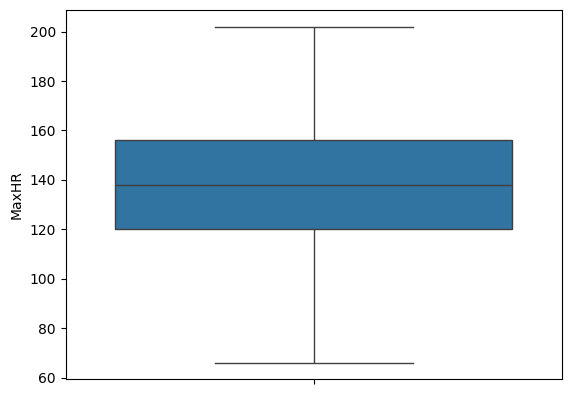

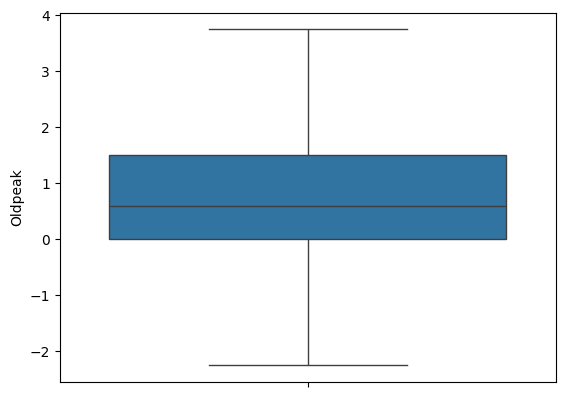

In [14]:
for column in numerical_column:
  sns.boxplot(df[column])
  plt.show()

In [15]:
df["HeartDisease"].unique()

array([0, 1])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [17]:
categorical_column

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [18]:
df[categorical_column].head(10)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
5,M,NAP,Normal,N,Up
6,F,ATA,Normal,N,Up
7,M,ATA,Normal,N,Up
8,M,ASY,Normal,Y,Flat
9,F,ATA,Normal,N,Up


ChestPainType_ATA | ChestPainType_NAP | ChestPainType_ASY
True                False                   False
False               True                    False

In [19]:
from sklearn.preprocessing import LabelEncoder

df[categorical_column]=df[categorical_column].astype(str)
le = LabelEncoder()
for column in categorical_column:
    df[column] = le.fit_transform(df[column])

df[categorical_column]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [21]:
df["HeartDisease"].unique()

array([0, 1])

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns="HeartDisease")
y = df["HeartDisease"].astype(int)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.11853217, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.3124939 , -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.85127647, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.85127647,  1.05211381]])

# CEK TIPE DARI NILAI DI KOLOM Y

In [25]:
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y))

binary


In [26]:
y.describe

<bound method NDFrame.describe of 0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64>

## MEMILIH SELECTOR K-BEST

In [27]:
selector = SelectKBest(score_func=mutual_info_classif)
X_new = selector.fit_transform(X_scaled, y)

X_new

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.11853217, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.3124939 , -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.85127647, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.85127647,  1.05211381]])

# RANDOM FOREST DENGAN PIPELINE

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(score_func=mutual_info_classif)),
    ("model", RandomForestClassifier())
])

param_grid = {
    "model__max_depth": [5, 10, 14, 20, 30, 35],
    "model__random_state": [42, 52, 68]
}

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=68)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=68)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',     
    cv=cv,
    n_jobs=-1,             
    verbose=2
)

gs.fit(X_train, y_train)

print("Best Score:", gs.best_score_)
print("Best Params:", gs.best_params_)
print("Best Estimator:", gs.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score: 0.8765048132867872
Best Params: {'model__max_depth': 5, 'model__random_state': 68}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7fd2855280e0>)),
                ('model',
                 RandomForestClassifier(max_depth=5, random_state=68))])


In [46]:
from sklearn.metrics import classification_report
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       110
           1       0.77      0.92      0.84       120

    accuracy                           0.82       230
   macro avg       0.83      0.81      0.81       230
weighted avg       0.83      0.82      0.81       230

[CV] END .........model__max_depth=5, model__random_state=52; total time=   0.3s
[CV] END ........model__max_depth=20, model__random_state=52; total time=   0.3s
[CV] END ........model__max_depth=35, model__random_state=68; total time=   0.2s
[CV] END ........model__max_depth=14, model__random_state=52; total time=   0.3s
[CV] END ........model__max_depth=30, model__random_state=52; total time=   0.4s
[CV] END .........model__max_depth=5, model__random_state=68; total time=   0.5s
[CV] END ........model__max_depth=20, model__random_state=52; total time=   0.2s
[CV] END ........model__max_depth=30, model__random_state=52; total time=   0.4s
[CV] END ........model__m

CV Score (F1) terbaik: 0.8769016472868216
Kombinasi model terbaik: Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7fd2855280e0>)),
                ('model',
                 RandomForestClassifier(max_depth=5, random_state=42))])

Skor Test (akurasi) Random Forest: 0.8188405797101449


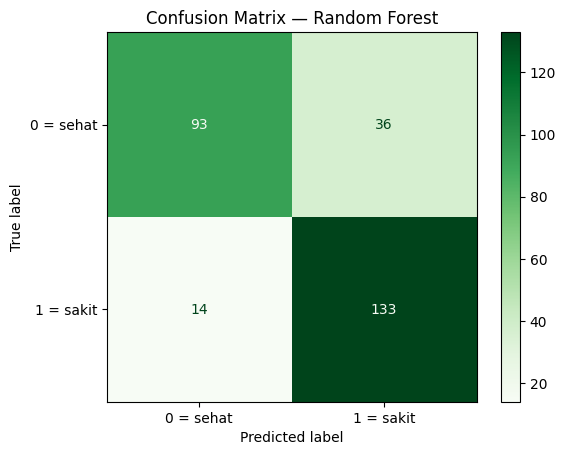


Classification Report — Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       129
           1       0.79      0.90      0.84       147

    accuracy                           0.82       276
   macro avg       0.83      0.81      0.81       276
weighted avg       0.83      0.82      0.82       276

[CV] END ........model__max_depth=14, model__random_state=68; total time=   0.3s
[CV] END ........model__max_depth=30, model__random_state=52; total time=   0.2s
[CV] END ........model__max_depth=20, model__random_state=42; total time=   0.3s
[CV] END ........model__max_depth=14, model__random_state=52; total time=   0.2s
[CV] END ........model__max_depth=35, model__random_state=42; total time=   0.2s
[CV] END ........model__max_depth=14, model__random_state=52; total time=   0.4s
[CV] END .........model__max_depth=5, model__random_state=68; total time=   0.3s
[CV] END ........model__max_depth=35, model__random_state=42; tot

In [40]:
print("CV Score (F1) terbaik:", gs.best_score_)        
print("Kombinasi model terbaik:", gs.best_estimator_)     

lr_test_score = gs.best_estimator_.score(X_test,y_test)
print("\nSkor Test (akurasi) Random Forest:", lr_test_score)

selector = gs.best_estimator_.named_steps['scaler']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)  
    print("\nFitur terbaik (terpilih):", selected)

lr_pred = gs.predict(X_test)              
cm_lr = confusion_matrix(y_test, lr_pred)  
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0 = sehat','1 = sakit'])
disp_lr.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Random Forest")
plt.show()

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report — Random Forest:\n", classification_report(y_test, lr_pred))  

In [30]:
import pickle
with open('modelRandomForest.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [31]:
y_pred = gs.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       129
           1       0.79      0.90      0.84       147

    accuracy                           0.82       276
   macro avg       0.83      0.81      0.81       276
weighted avg       0.83      0.82      0.82       276



# LOGISTIC REGRESSION DENGAN PIPELINE STANDARD SCALER

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, mutual_info_classif
from sklearn.metrics import classification_report
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),                 
    ("selector", SelectKBest()),  
    ("model", LogisticRegression(max_iter=1000))
])

param_grid = [
    {
        "scaler": [StandardScaler(), MinMaxScaler()],
        "selector": [
            SelectKBest(score_func=f_classif),
            SelectKBest(score_func=mutual_info_classif)
        ],
        "selector__k": [5, 10, 20, 'all'],
        "model__C": [0.01, 0.1, 1, 10],
        "model__class_weight": [None, "balanced"],
        "model__solver": ["lbfgs"]  
    },
    {
        "scaler": [StandardScaler(), MinMaxScaler()],
        "selector": [
            SelectPercentile(score_func=f_classif),
            SelectPercentile(score_func=mutual_info_classif)
        ],
        "selector__percentile": [10, 20, 30, 50, 100],
        "model__C": [0.01, 0.1, 1, 10],
        "model__class_weight": [None, "balanced"],
        "model__solver": ["lbfgs"]
    }
]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=68)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=68)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring="f1_macro"   
)

print("Menjalankan GridSearch untuk Logistic Regression...")
start = time.time()
gs.fit(X_train, y_train)                       
print(f"Logistic Regression selesai dalam {time.time() - start:.2f} detik")


Menjalankan GridSearch untuk Logistic Regression...


/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constan

Logistic Regression selesai dalam 1.62 detik


/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constan

CV Score (F1) terbaik: 0.8623948305991634
Kombinasi model terbaik: Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest()),
                ('model', LogisticRegression(C=0.1, max_iter=1000))])

Skor Test (akurasi) Logistic Regression: 0.7971014492753623

Fitur terbaik (terpilih): ['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


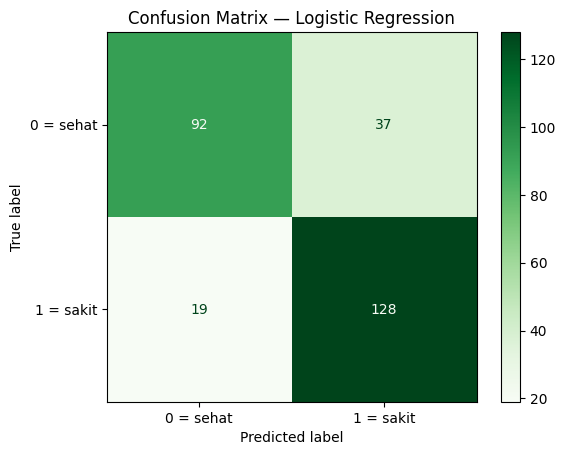


Classification Report — Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       129
           1       0.78      0.87      0.82       147

    accuracy                           0.80       276
   macro avg       0.80      0.79      0.79       276
weighted avg       0.80      0.80      0.80       276



In [56]:
print("CV Score (F1) terbaik:", gs.best_score_)        
print("Kombinasi model terbaik:", gs.best_estimator_)     

lr_test_score = gs.best_estimator_.score(X_test,y_test)
print("\nSkor Test (akurasi) Logistic Regression:", lr_test_score)

selector = gs.best_estimator_.named_steps['selector']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)  
    print("\nFitur terbaik (terpilih):", selected)

lr_pred = gs.predict(X_test)              
cm_lr = confusion_matrix(y_test, lr_pred)  
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0 = sehat','1 = sakit'])
disp_lr.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report — Logistic Regression:\n", classification_report(y_test, lr_pred))  

# YANG TERBAIK ADALAH RANDOM FOREST DENGAN PERSENTASI 82%

In [35]:
import pickle
with open('modelLogisticRegression.pkl', 'wb') as file:
    pickle.dump(pipe, file)